In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Survey2020Responses_DupRemoved.csv')

In [3]:
punctdict = {" ":"_" , "?":"" , "(":"" , ")":"" , "[":"" , "]":"" , "/":"_" , ",":"" , "<":"lessthan" , '"':"" , ".":""}
for col in df.columns:
    entryseries = df[col].astype("str")
    entrylist = list(entryseries)
    entrylist.sort()
    while "nan" in entrylist:
        entrylist.remove("nan")
    entryseries = pd.Series(entrylist)
    filename = col 
    for key in punctdict.keys():
        filename = filename.replace(key,punctdict[key])
    filename+=".csv"
    entryseries.to_csv(filename,index=False)

In [4]:
df['Trainee']=df.eval("`Which of the following roles best describes you?` in ['Undergraduate/Graduate student','Postdoctoral fellow']")

df['Imaging']=df.eval("`How would you describe your work?` <3")
df['Analyst']=df.eval("`How would you describe your work?` >5")
df['Balanced']=df.eval("`How would you describe your work?`in [3,4,5]")

In [5]:
df['Low']=df.eval("`How would you rate your comfort in developing new computational skills?` <3")
df['High']=df.eval("`How would you rate your comfort in developing new computational skills?` >5")
df['Medium']=df.eval("`How would you rate your comfort in developing new computational skills?`in [3,4,5]")

In [6]:
sum(df['Trainee'])

207

In [7]:
sum(df['Imaging']),sum(df['Balanced']),sum(df['Analyst'])

(63, 349, 72)

In [8]:
sum(df['Low']),sum(df['Medium']),sum(df['High'])

(66, 236, 182)

In [9]:
df['WorkerType']=np.zeros(484)
df.loc[df['Imaging'] == True, 'WorkerType'] = 'Imaging'
df.loc[df['Analyst'] == True, 'WorkerType'] = 'Analyst'
df.loc[df['Balanced'] == True, 'WorkerType'] = 'Balanced'

In [10]:
df['ComfortLevel']=np.zeros(484)
df.loc[df['Low'] == True, 'ComfortLevel'] = 'Low Comfort'
df.loc[df['Medium'] == True, 'ComfortLevel'] = 'Medium Comfort'
df.loc[df['High'] == True, 'ComfortLevel'] = 'High Comfort'

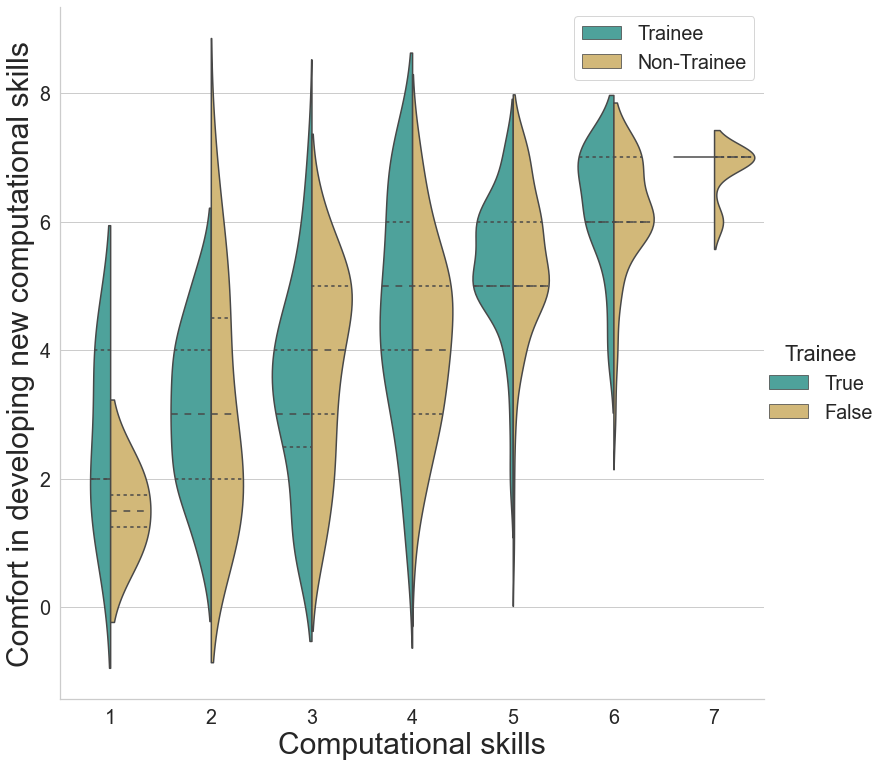

In [11]:
a4_dims = (11, 8.5)
sns.set(font_scale = 1.8)
palette = sns.color_palette(["#40B0A6","#E1BE6A"])
sns.set_style("whitegrid")
g = sns.catplot(data=df,x='How would you rate your computational skills?', 
                        y='How would you rate your comfort in developing new computational skills?',
                split=True,inner="quartile",
                hue='Trainee', hue_order=[True,False],
                kind="violin", height=11,palette=palette)

handles, lables = g.fig.get_axes()[0].get_legend_handles_labels()
g.fig.get_axes()[0].legend(handles,["Trainee","Non-Trainee"])

g.set_axis_labels("Computational skills","Comfort in developing new computational skills",size=30)
#plt.savefig("TraineeCompSkill_NewLabel_C.png",bbox_inches='tight',dpi=300)


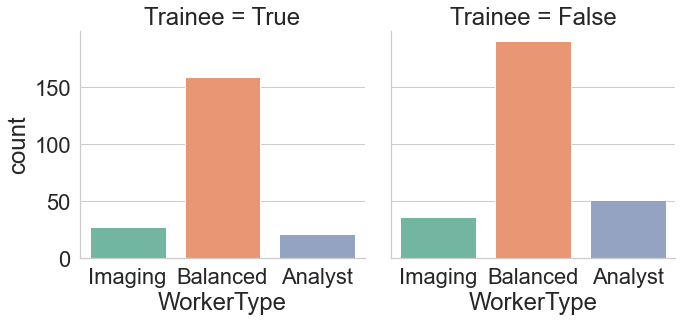

In [13]:
a4_dims = (11, 8.5)
sns.set(font_scale = 2)

sns.set_style("whitegrid")
g = sns.catplot(data=df,kind='count',col="Trainee", col_order=[True,False],
                x='WorkerType',order=['Imaging','Balanced','Analyst'],legend=True,palette="Set2")

#plt.savefig("TraineeWorkerType_C.png",bbox_inches='tight',dpi=300)

In [14]:
df['Student']=df.eval("`Which of the following roles best describes you?` == 'Undergraduate/Graduate student'")
df['Postdoc']=df.eval("`Which of the following roles best describes you?` == 'Postdoctoral fellow'")
df['PI']=df.eval("`Which of the following roles best describes you?` == 'Principal investigator'")
df['Image analyst']=df.eval("`Which of the following roles best describes you?` == 'Image analyst'")
df['Facility director']=df.eval("`Which of the following roles best describes you?` == 'Facility director'")
df['Facility staff']=df.eval("`Which of the following roles best describes you?` == 'Facility staff'")
df['Clinician']=df.eval("`Which of the following roles best describes you?` == 'Clinician'")
df['OtherRoles']=df.eval("`Which of the following roles best describes you?` not in ['Undergraduate/Graduate student','Postdoctoral fellow','Principal investigator','Image analyst','Facility director','Facility staff','Clinician']")

In [15]:
sum(df['Student']),sum(df['Postdoc']),sum(df['PI']),sum(df['Image analyst']),sum(df['Facility director']),sum(df['Facility staff']),sum(df['Clinician']),sum(df['OtherRoles'])

(99, 108, 70, 30, 28, 65, 1, 83)

In [16]:
df['Roles']=np.zeros(484)
df.loc[df['Student'] == True, 'Roles'] = 'Student'
df.loc[df['Postdoc'] == True, 'Roles'] = 'Postdoc'
df.loc[df['PI'] == True, 'Roles'] = 'PI'
df.loc[df['Image analyst'] == True, 'Roles'] = 'Image analyst'
df.loc[df['Facility director'] == True, 'Roles'] = 'Facility director'
df.loc[df['Facility staff'] == True, 'Roles'] = 'Facility staff'
df.loc[df['Clinician'] == True, 'Roles'] = 'Clinician'
df.loc[df['OtherRoles'] == True, 'Roles'] = 'OtherRoles'

<Figure size 792x612 with 0 Axes>

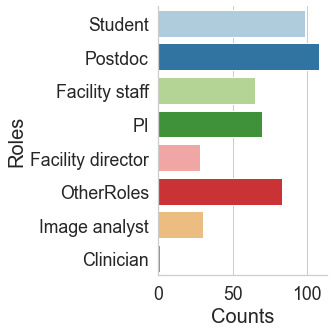

In [17]:
a4_dims = (11, 8.5)
plt.figure(figsize=a4_dims)
sns.set(font_scale = 1.6)
sns.set_style("whitegrid")
chart = sns.catplot(data=df, kind='count', y='Roles',palette="Paired")
chart.set_xlabels("Counts", fontsize = 20)
chart.set_ylabels("Roles", fontsize = 20)
plt.savefig("RolesCounts_New.png",bbox_inches='tight',dpi=300)

In [19]:
columns = list(df.columns)
interest_level = [x for x in columns if "How interested are you in learning more about the following topics?" in x]
separated = df.melt(value_vars=interest_level, var_name='TopicofInterest', value_name='InterestLevel')

separated['InterestTopic'] = separated['TopicofInterest'].replace({interest_level[0]: 'Image analysis theory',
                                    interest_level[1]: 'General image analysis practices',
                                    interest_level[2]: 'Image analysis practices particular to my field',
                                    interest_level[3]: 'Learning to use a particular software tool',
                                    interest_level[4]: 'Deep learning as applied to image analysis'})


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'How interested are you in learning more about the following topics?')

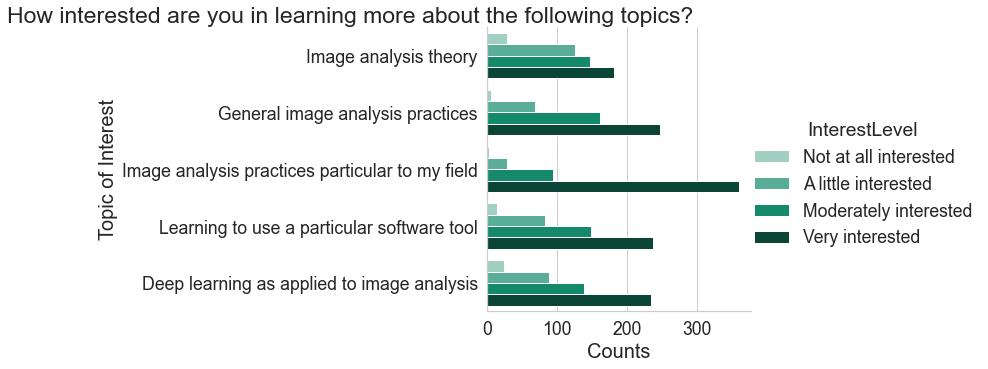

In [20]:
palette = sns.color_palette(["#99d8c7","#4cbb9d","#009e73","#004f39"])
sns.set_style("whitegrid")

g = sns.catplot(data=separated,kind='count',              
                 y='InterestTopic', 
                 order=['Image analysis theory','General image analysis practices','Image analysis practices particular to my field','Learning to use a particular software tool','Deep learning as applied to image analysis'],
                hue='InterestLevel', hue_order=['Not at all interested','A little interested','Moderately interested','Very interested'],legend=True,palette=palette)

g.set_xlabels("Counts", fontsize = 20)
g.set_ylabels("Topic of Interest", fontsize = 20)
g.fig.suptitle("How interested are you in learning more about the following topics?",horizontalalignment='right')
#plt.savefig("TopicofInterest_Learning_New3.png",bbox_inches='tight',dpi=300)


In [21]:
columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['How would you rate your computational skills?','WorkerType','Trainee'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})
#melted.head()

Text(0.5, 1.02, "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways?")

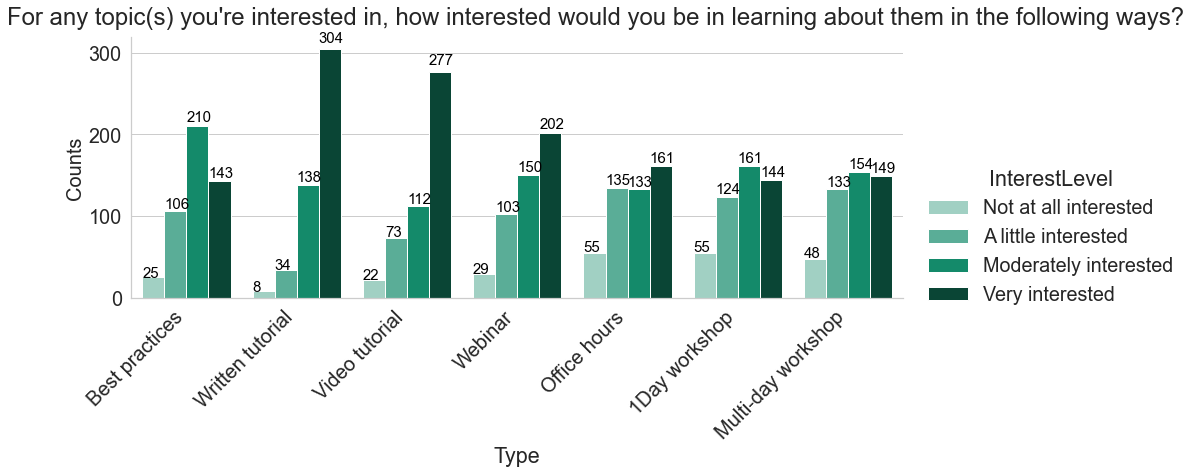

In [22]:
sns.set(font_scale=1.8)
palette = sns.color_palette(["#99d8c7","#4cbb9d","#009e73","#004f39"])
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',
                x='Type',
                order=['BestPracticesArticle','WrittenTutorial','VideoTutorial','InteractiveWebinar','OfficeHours','1DayWorkshop','MultiDayWorkshop'],
                hue='InterestLevel',hue_order=['Not at all interested','A little interested','Moderately interested','Very interested'],aspect=2.5,palette=palette)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.001, 
            p.get_height() * 1.03, 
           '{0:.0f}'.format(p.get_height()),   
            color='black', 
            rotation='horizontal', 
            size='x-small')

g.set_xticklabels(["Best practices", "Written tutorial", "Video tutorial","Webinar","Office hours","1Day workshop","Multi-day workshop"],rotation=45,horizontalalignment='right',fontsize=20)
g.set_ylabels("Counts", fontsize = 20)
g.fig.suptitle("For any topic(s) you're interested in, how interested would you be in learning about them in the following ways?", y=1.02, fontsize=24)
#plt.savefig("LearningMethos_Interest_New2.png",bbox_inches='tight',dpi=300)

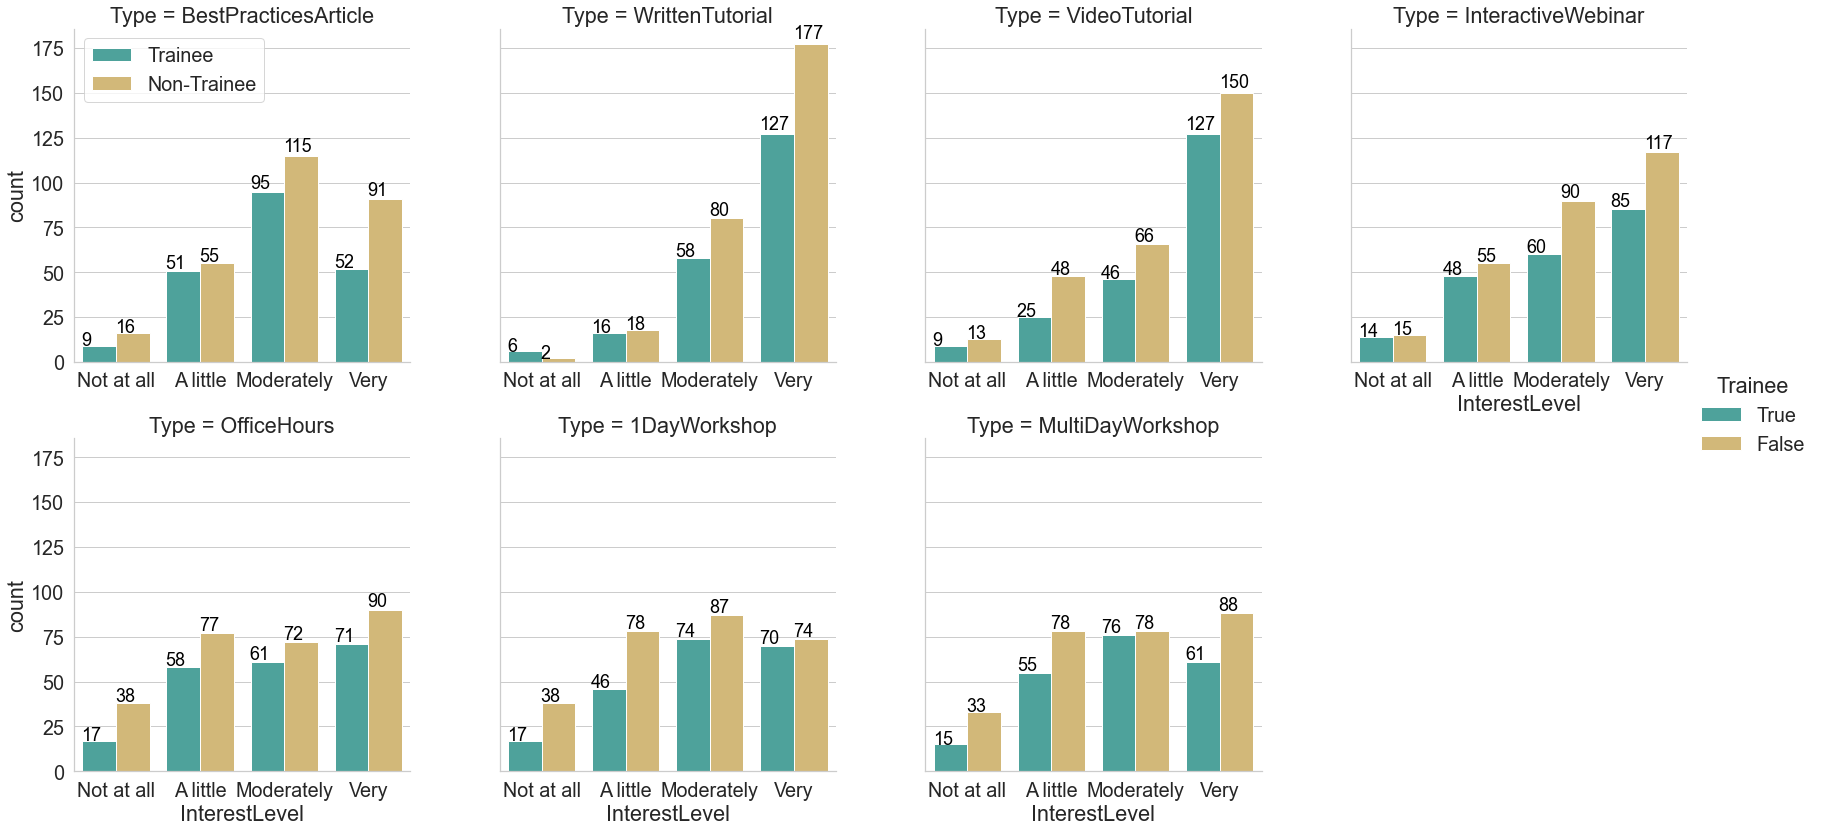

In [23]:
sns.set(font_scale=1.8)
palette = sns.color_palette(["#40B0A6","#E1BE6A"])
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',col='Type',col_wrap=4,
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='Trainee',hue_order=[True,False],height=6,palette=palette)

g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])
for ax in g.axes.flatten():
    for p in ax.patches:
            ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   # for one decimal '{0:.1f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='small')
    ax.tick_params(labelbottom=True) 
    ax = g.facet_axis(0,0)
    
plt.legend(loc='upper left', labels=["Trainee","Non-Trainee"])
#plt.savefig("TraineeInterestinLM_C.png",bbox_inches='tight',dpi=300)

In [24]:
interest_list = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['How would you rate your computational skills?','WorkerType','Trainee'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})
#melted.head()

In [25]:
df['MicroscopeComSoftware']=df.eval("`What image analysis tools do you use the most?` == 'Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)'")
df['OtherCommercialSoftware']=df.eval("`What image analysis tools do you use the most?` == 'Other commercial software (Imaris, Volocity, etc)'")
df['OpenSourcePoint&Click']=df.eval("`What image analysis tools do you use the most?` == 'Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)'")
df['CompLibrary&Scripts']=df.eval("`What image analysis tools do you use the most?` == 'Computational libraries and scripts (scikit-image, MATLAB, etc)'")
df['None']=df.eval("`What image analysis tools do you use the most?` == 'None'") 
df['OtherSoftware']=df.eval("`What image analysis tools do you use the most?` not in ['Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)','Other commercial software (Imaris, Volocity, etc)','Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)','Computational libraries and scripts (scikit-image, MATLAB, etc)']")

In [26]:
sum(df['MicroscopeComSoftware']),sum(df['OtherCommercialSoftware']),sum(df['OpenSourcePoint&Click']),sum(df['CompLibrary&Scripts']),sum(df['None']),sum(df['OtherSoftware'])

(34, 34, 323, 77, 0, 16)

In [27]:
df['Most used software']=np.zeros(484)
df.loc[df['MicroscopeComSoftware'] == True, 'Most used software'] = 'Microscope commercial software'
df.loc[df['OtherCommercialSoftware'] == True, 'Most used software'] = 'Other commercial software'
df.loc[df['OpenSourcePoint&Click'] == True, 'Most used software'] = 'Open-source point & click'
df.loc[df['CompLibrary&Scripts'] == True, 'Most used software'] = 'Computational library & scripts'
df.loc[df['None'] == True, 'Most used software'] = 'None'
df.loc[df['OtherSoftware'] == True, 'Most used software'] = 'Other software'

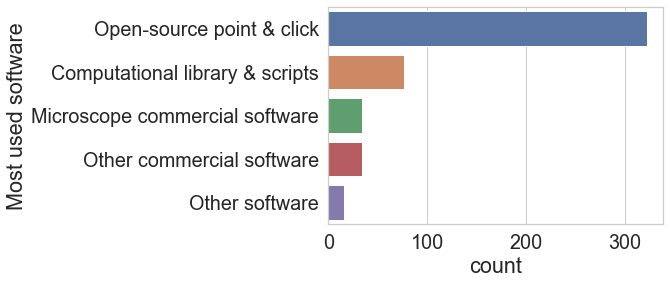

In [28]:
sns.set_style("whitegrid")
chartSoft = sns.countplot(data=df, y='Most used software', order=['Open-source point & click','Computational library & scripts','Microscope commercial software','Other commercial software','Other software'])
plt.savefig("MostUsedSoftware_Updated.png",bbox_inches='tight',dpi=300)
#chartSoft.set_xticklabels(rotation=-15)

In [29]:
print(df.groupby('Imaging').mean()['How would you rate your computational skills?'][True],
      df.groupby('Imaging').std()['How would you rate your computational skills?'][True],
      df.groupby('Balanced').mean()['How would you rate your computational skills?'][True],
      df.groupby('Balanced').std()['How would you rate your computational skills?'][True],
      df.groupby('Analyst').mean()['How would you rate your computational skills?'][True],
      df.groupby('Analyst').std()['How would you rate your computational skills?'][True])

3.5873015873015874 1.4214363548199727 4.163323782234957 1.3149128553929372 5.402777777777778 1.4008018048248747


In [30]:
print(df.groupby('Imaging').sum)

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fbbad172190>>


In [31]:
df['How would you rate your comfort in developing new computational skills?'].mean()

4.725206611570248

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


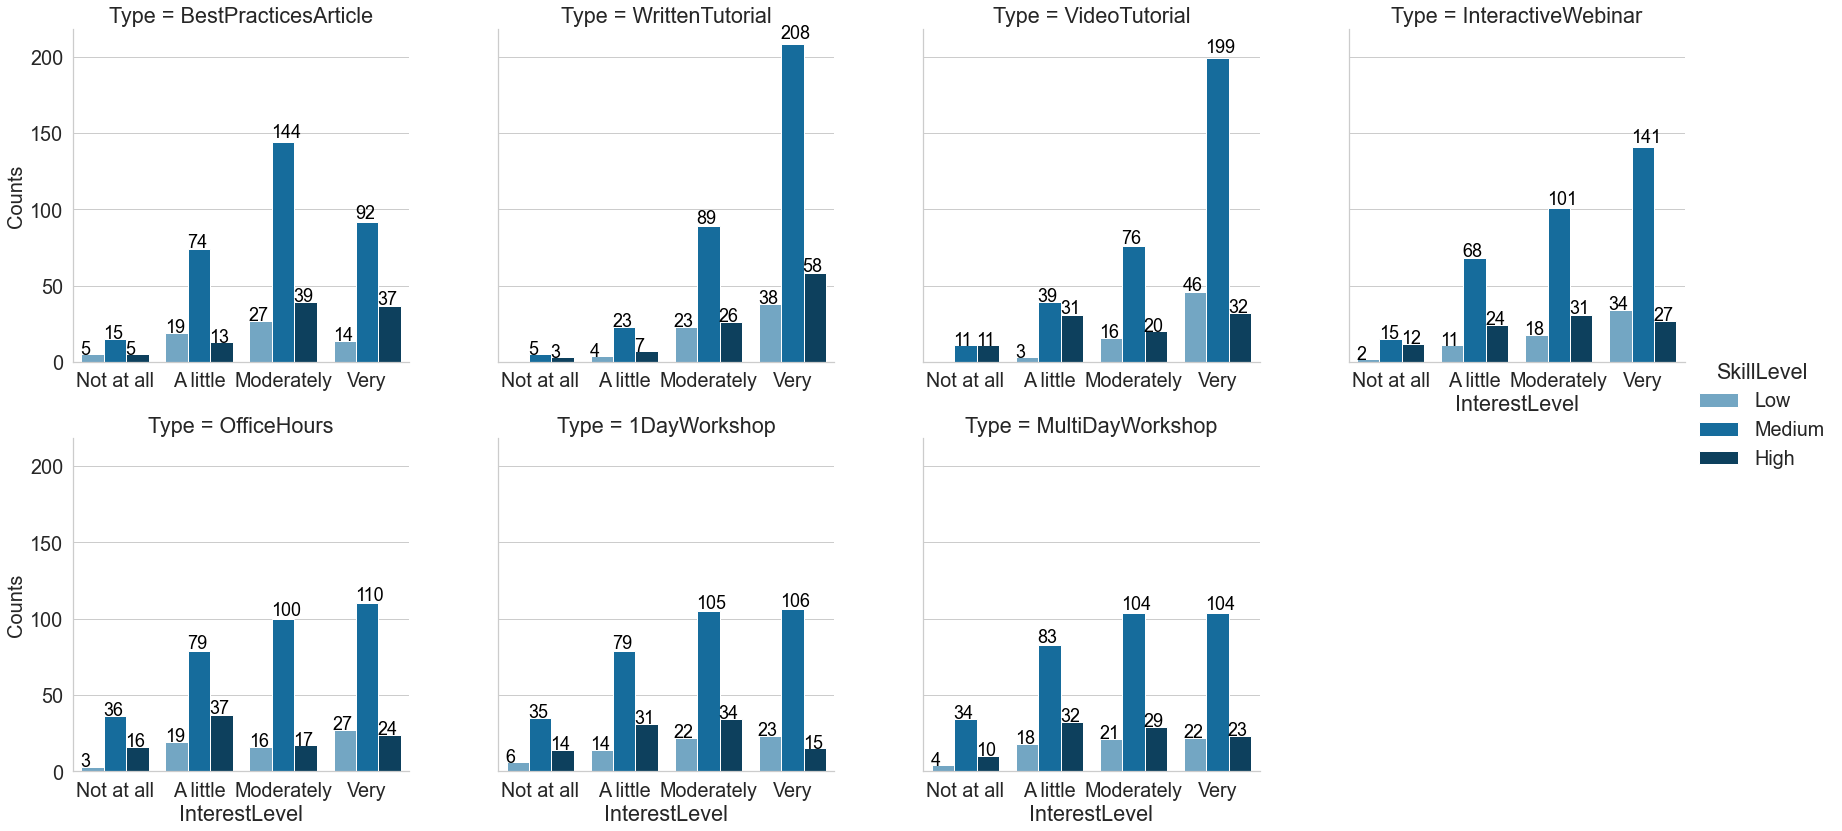

In [32]:
df['LowSkills'] = df.eval("`How would you rate your computational skills?` < 3")
df['MedSkills'] = df.eval("`How would you rate your computational skills?` in [3,4,5]")
df['HighSkills'] = df.eval("`How would you rate your computational skills?` > 5")

df['SkillLevel'] = [0]*df.shape[0]
df.loc[df['LowSkills'] == True, 'SkillLevel'] = 'Low'
df.loc[df['MedSkills'] == True, 'SkillLevel'] = 'Medium'
df.loc[df['HighSkills'] == True, 'SkillLevel'] = 'High'

columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['SkillLevel'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})

sns.set(font_scale=1.8)
palette = sns.color_palette(["#66aad0","#0072b2","#00446a"])
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',col='Type',col_wrap=4,
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='SkillLevel',hue_order=['Low','Medium','High'],height=6,palette=palette)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])

for ax in g.axes.flatten():
    for p in ax.patches:
            ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   # for one decimal '{0:.1f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='small')
    ax.tick_params(labelbottom=True) 
    ax = g.facet_axis(0,0)

g.set_ylabels("Counts", fontsize = 20)
#plt.savefig("InterestLearning_CompSkill_C.png",bbox_inches='tight',dpi=300)

In [33]:
columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted_compcomfort = df.melt(id_vars=['ComfortLevel'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted_compcomfort['Type'] = melted_compcomfort['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})
#melted_compcomfort.head()

posx and posy should be finite values
posx and posy should be finite values


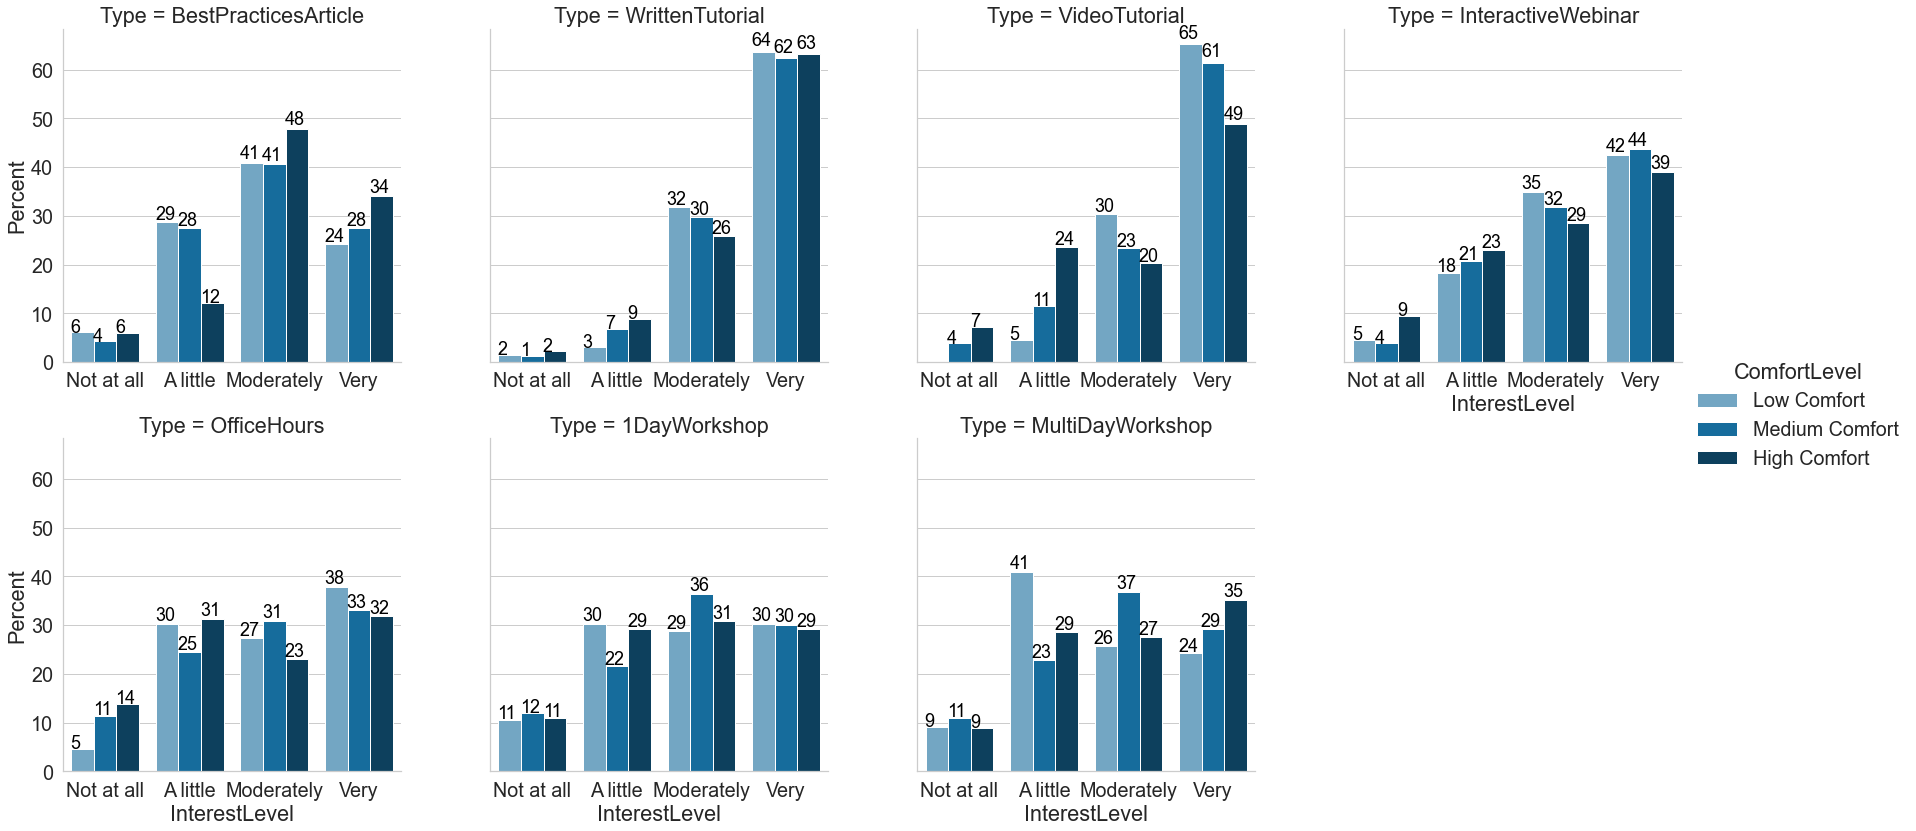

In [34]:
normalized_compcomfort = melted_compcomfort.groupby(['Type','ComfortLevel'])['InterestLevel'].value_counts(normalize=True).reset_index(name='Percent')

normalized_compcomfort.Percent = normalized_compcomfort.Percent * 100
palette = sns.color_palette(["#66aad0","#0072b2","#00446a"])
g = sns.catplot(data=normalized_compcomfort,col='Type',x='InterestLevel',y='Percent',kind='bar',
                col_order=['BestPracticesArticle','WrittenTutorial','VideoTutorial','InteractiveWebinar','OfficeHours','1DayWorkshop','MultiDayWorkshop'],
                order=['Not at all interested', 'A little interested', 'Moderately interested', 'Very interested'],
                hue='ComfortLevel',hue_order=['Low Comfort','Medium Comfort','High Comfort'], col_wrap=4, height=6,palette=palette)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])

for ax in g.axes.flatten():
    for p in ax.patches:
            ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   # for one decimal '{0:.1f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='small')
    ax.tick_params(labelbottom=True) 
    ax = g.facet_axis(0,0)

#plt.savefig("Normalized_CompComfort_InterestLearningMaterial_C.png",bbox_inches='tight',dpi=300)

In [35]:
columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted_all = df.melt(id_vars=['How would you rate your computational skills?','WorkerType','Trainee'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted_all['Type'] = melted_all['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})
#melted_all.head()

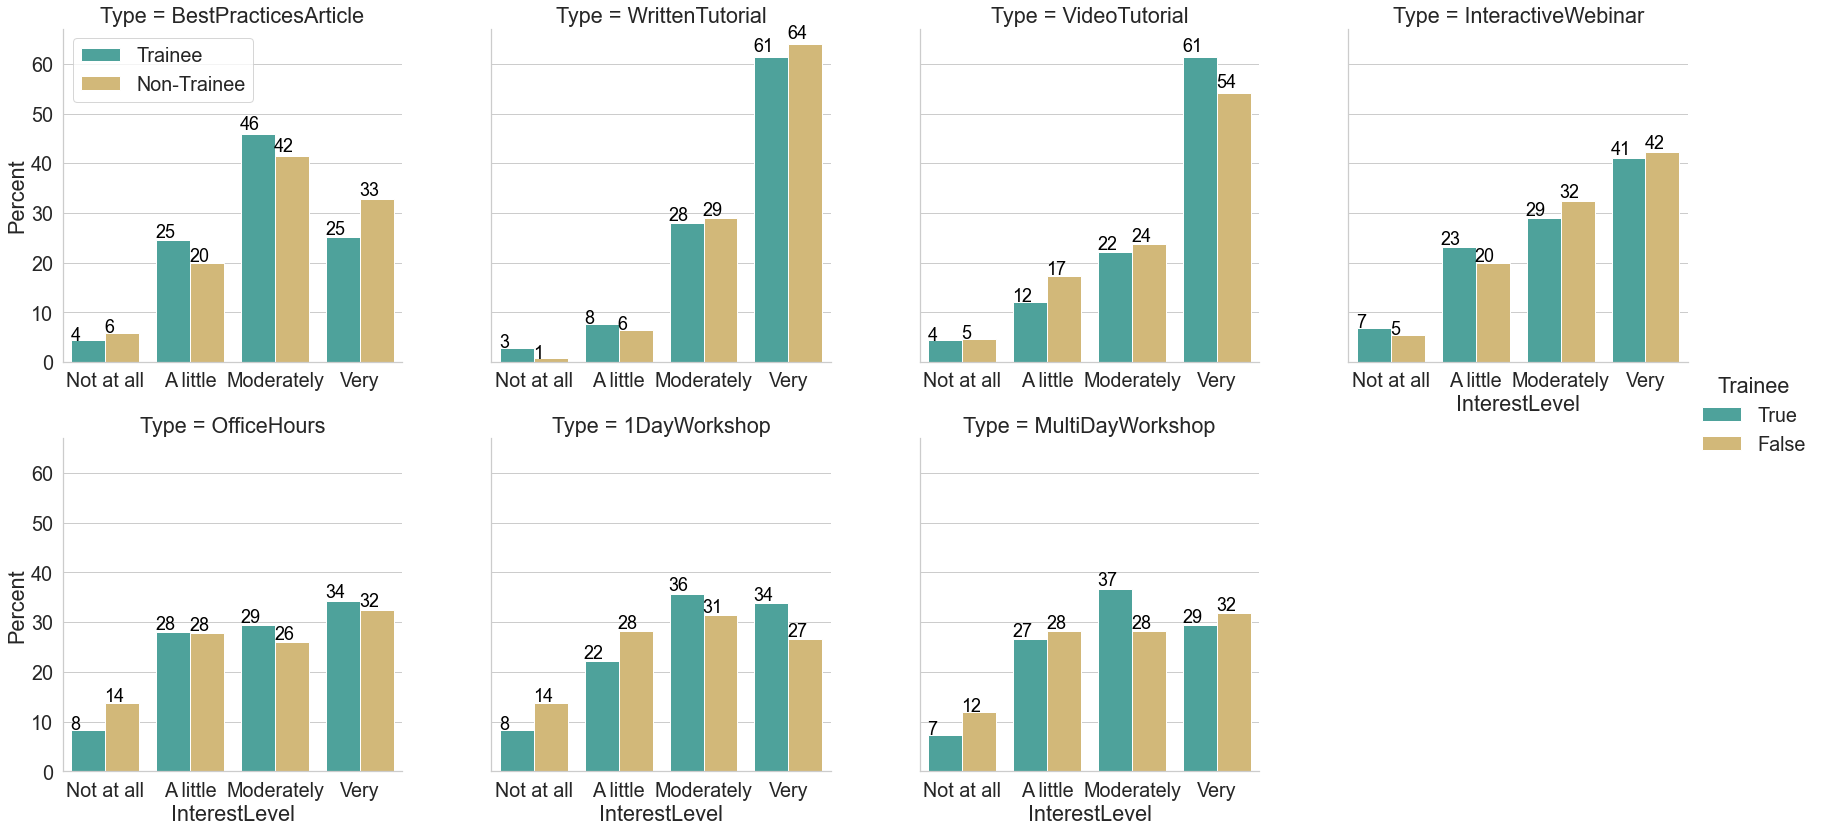

In [36]:
palette = sns.color_palette(["#40B0A6","#E1BE6A"])
normalized_trainee = melted_all.groupby(['Type','Trainee'])['InterestLevel'].value_counts(normalize=True).reset_index(name='Percent')

normalized_trainee.Percent = normalized_trainee.Percent * 100

g = sns.catplot(data=normalized_trainee,col='Type',x='InterestLevel',y='Percent',kind='bar',
                col_order=['BestPracticesArticle','WrittenTutorial','VideoTutorial','InteractiveWebinar','OfficeHours','1DayWorkshop','MultiDayWorkshop'],
                order=['Not at all interested', 'A little interested', 'Moderately interested', 'Very interested'],
                hue='Trainee',hue_order=[True,False],col_wrap=4, height=6,palette=palette)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])

for ax in g.axes.flatten():
    for p in ax.patches:
            ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   # for one decimal '{0:.1f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='small')
    ax.tick_params(labelbottom=True) 
    ax = g.facet_axis(0,0)

    
handles, lables = g.fig.get_axes()[0].get_legend_handles_labels()
g.fig.get_axes()[0].legend(handles,["Trainee","Non-Trainee"],loc='upper left')
    
#plt.legend(loc='upper left', labels=["Trainee","Non-Trainee"])    
#plt.savefig("Normalized_Trainee_InterestLearningMaterial_C.png",bbox_inches='tight',dpi=300)

posx and posy should be finite values
posx and posy should be finite values


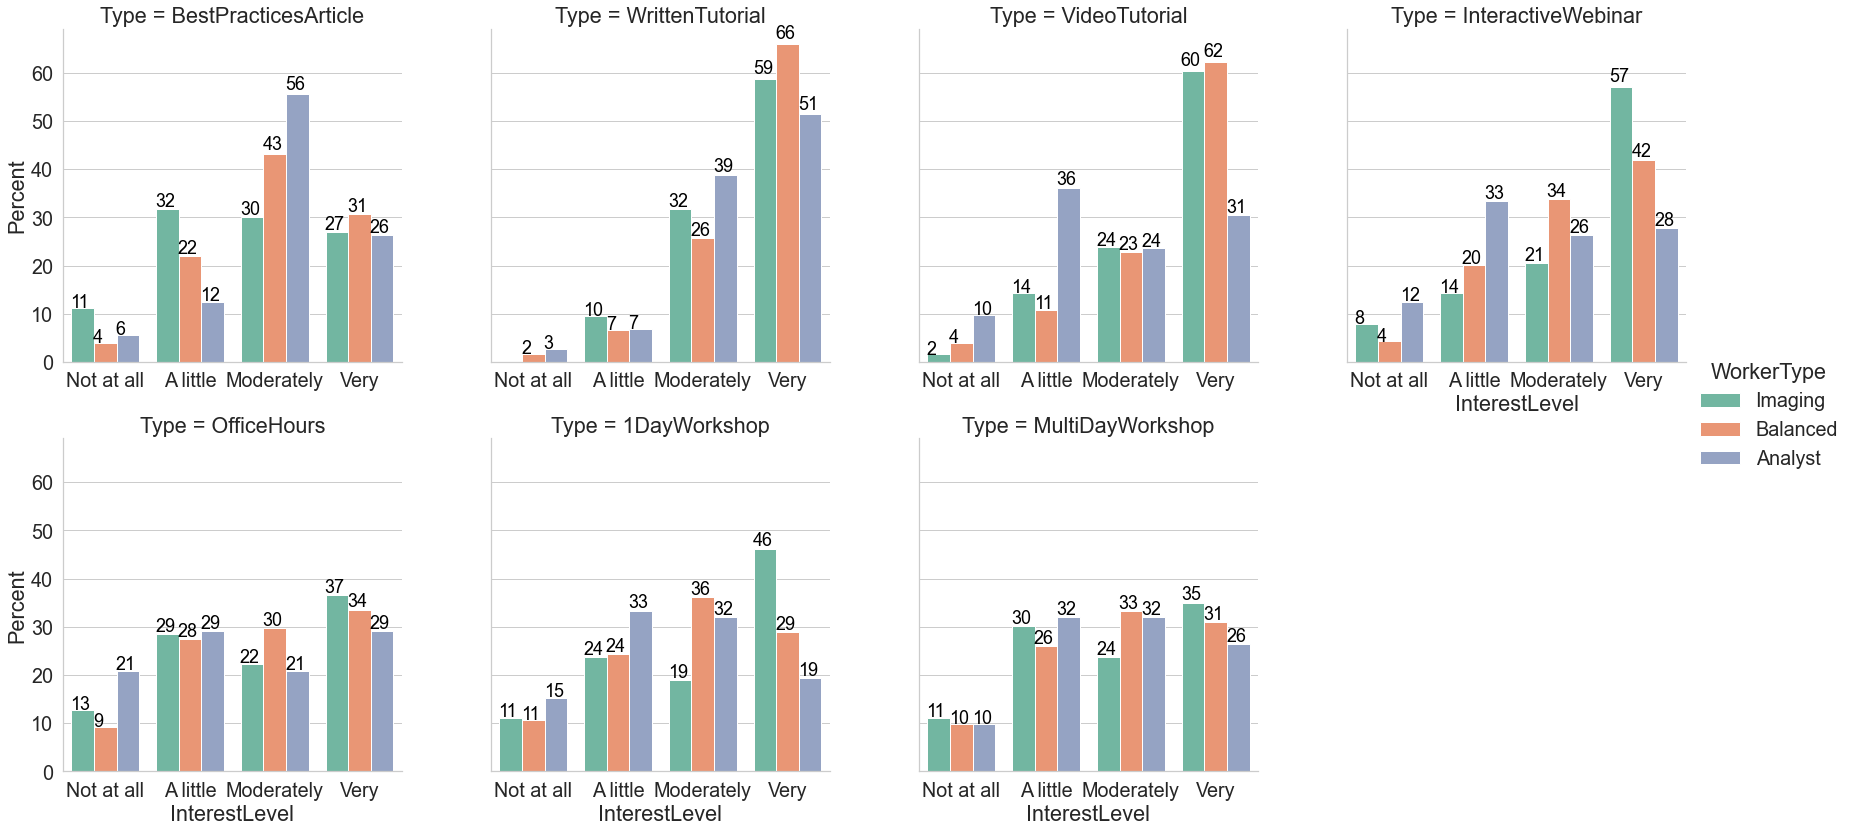

In [37]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
#palette = sns.color_palette(["#2D5A7A","#eaae7f","#3CB371"])
normalized_worker = melted_all.groupby(['Type','WorkerType'])['InterestLevel'].value_counts(normalize=True).reset_index(name='Percent')

normalized_worker.Percent = normalized_worker.Percent * 100

g = sns.catplot(data=normalized_worker,col='Type',x='InterestLevel',y='Percent',kind='bar',
                col_order=['BestPracticesArticle','WrittenTutorial','VideoTutorial','InteractiveWebinar','OfficeHours','1DayWorkshop','MultiDayWorkshop'],
                order=['Not at all interested', 'A little interested', 'Moderately interested', 'Very interested'],
                hue='WorkerType',hue_order=['Imaging','Balanced','Analyst'],col_wrap=4, height=6,palette="Set2")
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])


for ax in g.axes.flatten():
    for p in ax.patches:
            ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   # for one decimal '{0:.1f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='small')
    ax.tick_params(labelbottom=True) 
    ax = g.facet_axis(0,0)

#plt.savefig("Normalized_WorkerType_InterestLearningMaterial.png",bbox_inches='tight',dpi=300)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


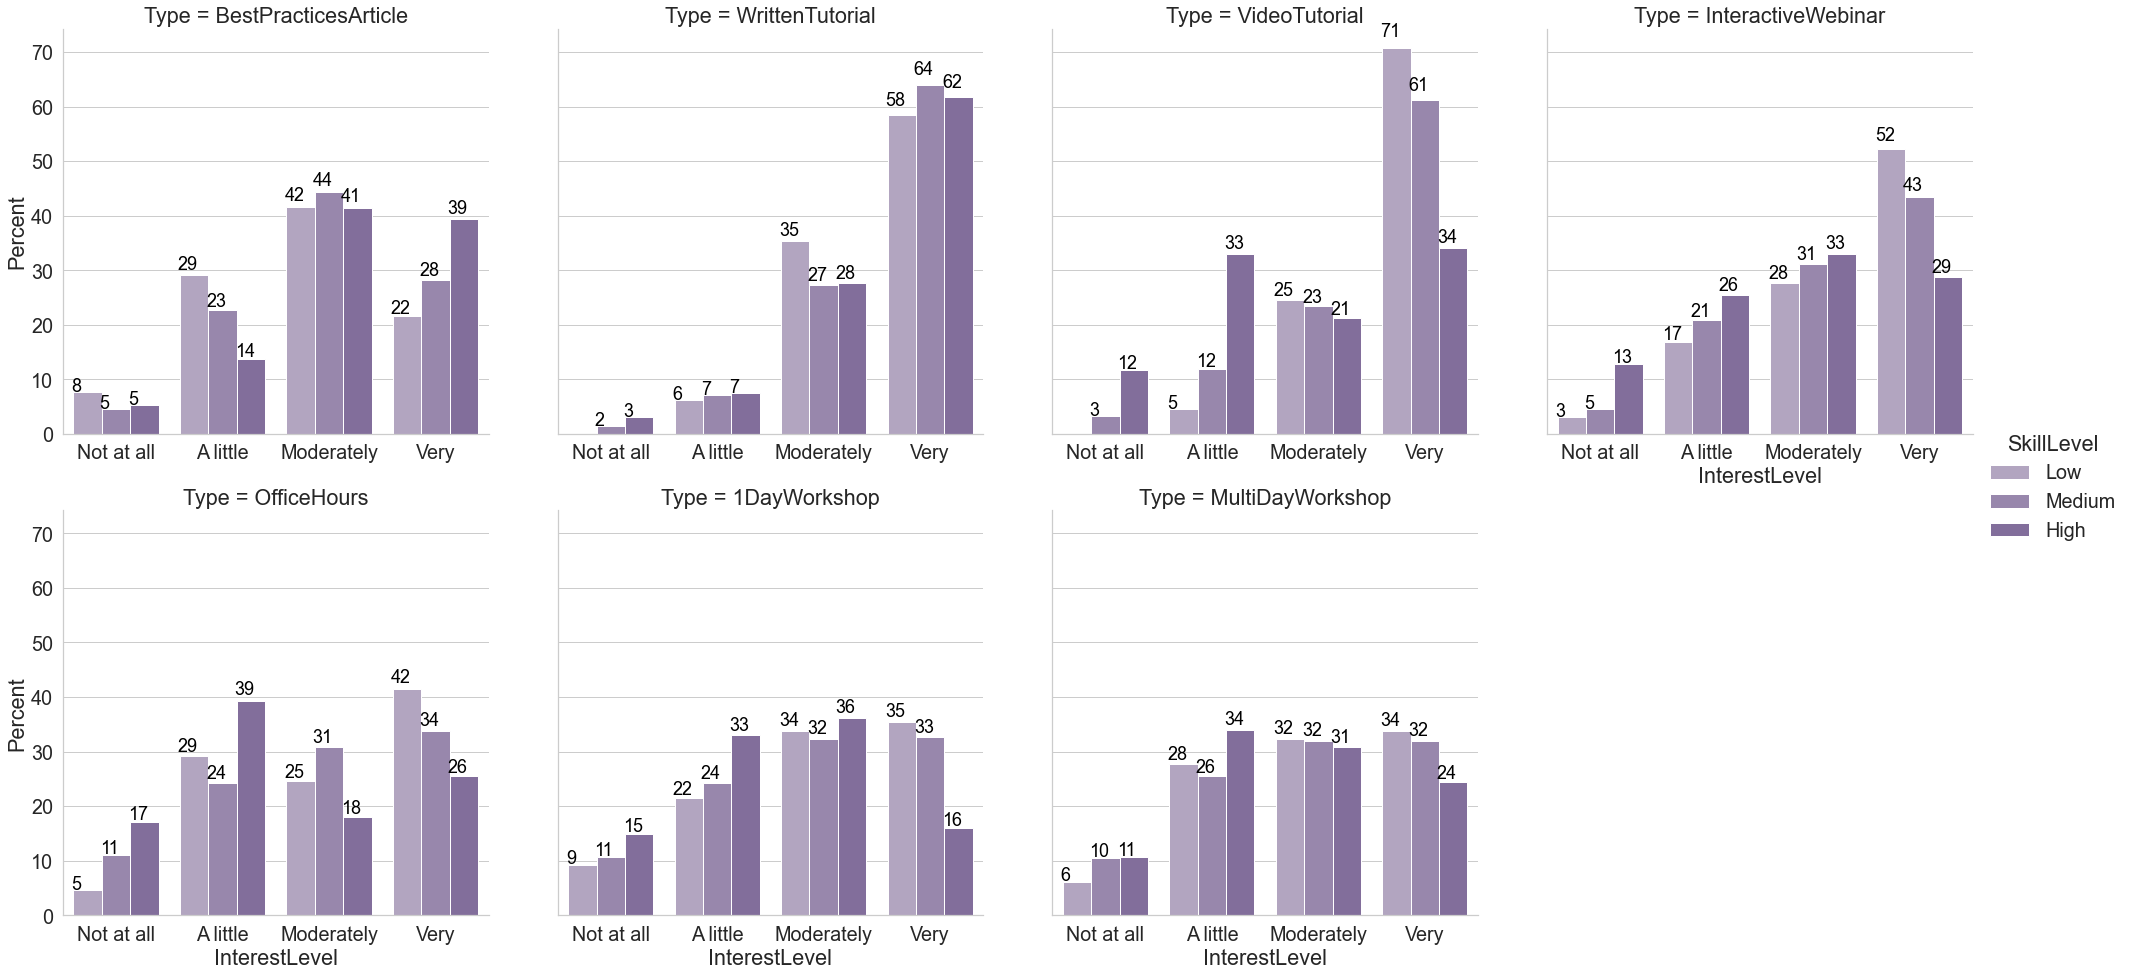

In [42]:
df['LowSkills'] = df.eval("`How would you rate your computational skills?` < 3")
df['MedSkills'] = df.eval("`How would you rate your computational skills?` in [3,4,5]")
df['HighSkills'] = df.eval("`How would you rate your computational skills?` > 5")

df['SkillLevel'] = [0]*df.shape[0]
df.loc[df['LowSkills'] == True, 'SkillLevel'] = 'Low'
df.loc[df['MedSkills'] == True, 'SkillLevel'] = 'Medium'
df.loc[df['HighSkills'] == True, 'SkillLevel'] = 'High'

columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['SkillLevel'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})

normalized_preferences = melted.groupby(['Type','SkillLevel'])['InterestLevel'].value_counts(normalize=True).reset_index(name='Percent')
#print(normalized_preferences.Fraction)
normalized_preferences.Percent = normalized_preferences.Percent * 100
#print(normalized_preferences.Fraction)
#palette = sns.color_palette(["#F1C6DB","#DA9EBC","#C3739B"])
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
palette = sns.color_palette(["#b2a1c4","#9881b2","#8166a3"])

g = sns.catplot(data=normalized_preferences,col='Type',x='InterestLevel',hue='SkillLevel', y='Percent', kind='bar',
                col_order=['BestPracticesArticle','WrittenTutorial','VideoTutorial','InteractiveWebinar','OfficeHours','1DayWorkshop','MultiDayWorkshop'],
                order=['Not at all interested', 'A little interested', 'Moderately interested', 'Very interested'],
                hue_order=['Low','Medium','High'],col_wrap=4, height=7,palette=palette)

g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])


for ax in g.axes.flatten():
    for p in ax.patches:
            ax.text(p.get_x() - 0.02, 
            p.get_height() * 1.03, 
           '{0:.0f}'.format(p.get_height()),   # for one decimal '{0:.1f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='small')
    ax.tick_params(labelbottom=True) 
    ax = g.facet_axis(0,0)

plt.savefig("Normalized_SkillLvl_InterestLearningMaterial_C2.png",bbox_inches='tight',dpi=300)